In [2]:
import pandas as pd

df = pd.read_csv("dynamic_pricing.csv")

# check first few rows
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [4]:
print(df.isnull().sum())

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


In [5]:
print("Total Missing Values:", df.isnull().sum().sum())

Total Missing Values: 0


In [8]:
# Inspect the dataset
print("Rows, Columns:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissingness (%):")
print((df.isna().mean() * 100).round(2))

Rows, Columns: (1000, 10)

Column names: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

First 5 rows:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regu

In [9]:
# Create a unique ride_id for each row
df["ride_id"] = ["R" + str(i+1) for i in range(len(df))]

# Use Historical_Cost_of_Ride as baseline price
df["price_baseline"] = df["Historical_Cost_of_Ride"]

# For demo, create a recommended price (slightly adjusted baseline)
# Later this will come from your ML pricing model
df["price_recommended"] = df["price_baseline"] * 1.05   # +5% uplift

# Add default ride_status = 'completed' (can be updated with real statuses later)
df["ride_status"] = "completed"

# Each row is one booking attempt
df["booking_intents"] = 1

print(df[["ride_id","price_baseline","price_recommended","ride_status","booking_intents"]].head())


  ride_id  price_baseline  price_recommended ride_status  booking_intents
0      R1      284.257273         298.470137   completed                1
1      R2      173.874753         182.568490   completed                1
2      R3      329.795469         346.285242   completed                1
3      R4      470.201232         493.711293   completed                1
4      R5      579.681422         608.665493   completed                1


In [10]:
import numpy as np
import datetime as dt

# Simulate a timestamp column (for KPI grouping later)
start_date = dt.datetime(2025, 1, 1)
df["ts"] = [start_date + dt.timedelta(minutes=i*10) for i in range(len(df))]

print(df[["ride_id","ts"]].head())


  ride_id                  ts
0      R1 2025-01-01 00:00:00
1      R2 2025-01-01 00:10:00
2      R3 2025-01-01 00:20:00
3      R4 2025-01-01 00:30:00
4      R5 2025-01-01 00:40:00


In [11]:
# Standardize categorical fields: Location, Loyalty, Vehicle, Time_of_Booking
df["Location_Category"] = df["Location_Category"].str.title().str.strip()
df["Customer_Loyalty_Status"] = df["Customer_Loyalty_Status"].str.title().str.strip()
df["Vehicle_Type"] = df["Vehicle_Type"].str.title().str.strip()
df["Time_of_Booking"] = df["Time_of_Booking"].str.title().str.strip()

print("Unique values after normalization:")
print("Location:", df["Location_Category"].unique())
print("Loyalty:", df["Customer_Loyalty_Status"].unique())
print("Vehicle:", df["Vehicle_Type"].unique())
print("Time:", df["Time_of_Booking"].unique())

Unique values after normalization:
Location: ['Urban' 'Suburban' 'Rural']
Loyalty: ['Silver' 'Regular' 'Gold']
Vehicle: ['Premium' 'Economy']
Time: ['Night' 'Evening' 'Afternoon' 'Morning']


In [12]:
# Ensure numeric columns are valid
for col in ["Number_of_Riders","Number_of_Drivers","Number_of_Past_Rides",
            "Average_Ratings","Expected_Ride_Duration",
            "price_baseline","price_recommended"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

print(df.describe())


       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   
std           23.701506          19.068346             29.313774   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  \
count      1000.000000              1000.00000              1000.000000   
mean          4.257220                99.58800               372.502623   
min           3.500000                10.00000                25.993449   
25%           3.870000                59.75000               221.365202   
50%         

In [13]:
# Since we don’t have real status, we assume all completed
df["completed_rides"] = (df["ride_status"] == "completed").astype(int)
df["cancelled"] = (df["ride_status"] == "cancelled").astype(int)

print(df[["ride_status","completed_rides","cancelled"]].head())


  ride_status  completed_rides  cancelled
0   completed                1          0
1   completed                1          0
2   completed                1          0
3   completed                1          0
4   completed                1          0


In [14]:
# Ensure booking_intents ≥ completed + cancelled
min_required = (df["completed_rides"] + df["cancelled"]).clip(lower=1)
mask = df["booking_intents"] < min_required
df.loc[mask, "booking_intents"] = min_required[mask]


In [15]:
# Drop duplicates by ride_id
df = df.drop_duplicates(subset=["ride_id"]).reset_index(drop=True)

# Remove negative prices if any
df = df[(df["price_baseline"] >= 0) & (df["price_recommended"] >= 0)]

print("Final rows after cleaning:", len(df))


Final rows after cleaning: 1000


In [16]:
def cap_iqr(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    return series.clip(lower=q1 - k*iqr, upper=q3 + k*iqr)

for col in ["price_baseline","price_recommended","Expected_Ride_Duration"]:
    df[col] = cap_iqr(df[col])

print("Outliers capped using IQR method.")


Outliers capped using IQR method.


In [17]:
# Revenue = Price × Completed Rides
revenue_baseline = (df["price_baseline"] * df["completed_rides"]).sum()
revenue_recommended = (df["price_recommended"] * df["completed_rides"]).sum()

print("Revenue (Baseline): ₹", round(revenue_baseline, 2))
print("Revenue (Recommended): ₹", round(revenue_recommended, 2))


Revenue (Baseline): ₹ 372502.62
Revenue (Recommended): ₹ 391127.75


In [18]:
# Profit = (Price − Cost) × Completed Rides
# Map Historical_Cost_of_Ride → cost_per_ride
df["cost_per_ride"] = df["Historical_Cost_of_Ride"]
profit_baseline = ((df["price_baseline"] - df["cost_per_ride"]) * df["completed_rides"]).sum()
profit_recommended = ((df["price_recommended"] - df["cost_per_ride"]) * df["completed_rides"]).sum()

print("Profit (Baseline): ₹", round(profit_baseline, 2))
print("Profit (Recommended): ₹", round(profit_recommended, 2))


Profit (Baseline): ₹ 0.0
Profit (Recommended): ₹ 18625.13


In [19]:
# Revenue Lift = (Revenue_rec − Revenue_base) / Revenue_base × 100
if revenue_baseline != 0:
    revenue_lift = ((revenue_recommended - revenue_baseline) / revenue_baseline) * 100
else:
    revenue_lift = 0

print("Revenue Lift (%):", round(revenue_lift, 2))


Revenue Lift (%): 5.0


In [20]:
# Gross Margin = (Revenue − Cost) / Revenue × 100
total_cost = (df["cost_per_ride"] * df["completed_rides"]).sum()

gross_margin_baseline = ((revenue_baseline - total_cost) / revenue_baseline * 100) if revenue_baseline != 0 else 0
gross_margin_recommended = ((revenue_recommended - total_cost) / revenue_recommended * 100) if revenue_recommended != 0 else 0

print("Gross Margin (Baseline %):", round(gross_margin_baseline, 2))
print("Gross Margin (Recommended %):", round(gross_margin_recommended, 2))


Gross Margin (Baseline %): 0.0
Gross Margin (Recommended %): 4.76


In [21]:
# Conversion Rate = Completed Rides / Booking Intents × 100
conversion_rate = (df["completed_rides"].sum() / df["booking_intents"].sum()) * 100

print("Conversion Rate (%):", round(conversion_rate, 2))


Conversion Rate (%): 100.0


In [22]:
# Price Change Rate = (# rides where baseline ≠ recommended) / total rides × 100
price_change_rate = (df["price_baseline"] != df["price_recommended"]).sum() / len(df) * 100

print("Price Change Rate (%):", round(price_change_rate, 2))


Price Change Rate (%): 100.0


In [23]:
# Cancellation Rate = Cancelled Rides / Booking Intents × 100
cancellation_rate = (df["cancelled"].sum() / df["booking_intents"].sum()) * 100

print("Cancellation Rate (%):", round(cancellation_rate, 2))


Cancellation Rate (%): 0.0


In [24]:
kpis = {
    "Revenue (Baseline)": round(revenue_baseline, 2),
    "Revenue (Recommended)": round(revenue_recommended, 2),
    "Profit (Baseline)": round(profit_baseline, 2),
    "Profit (Recommended)": round(profit_recommended, 2),
    "Revenue Lift (%)": round(revenue_lift, 2),
    "Gross Margin Baseline (%)": round(gross_margin_baseline, 2),
    "Gross Margin Recommended (%)": round(gross_margin_recommended, 2),
    "Conversion Rate (%)": round(conversion_rate, 2),
    "Price Change Rate (%)": round(price_change_rate, 2),
    "Cancellation Rate (%)": round(cancellation_rate, 2),
}

print("\n=== KPI Summary ===")
for k, v in kpis.items():
    print(f"{k:30s}: {v}")



=== KPI Summary ===
Revenue (Baseline)            : 372502.62
Revenue (Recommended)         : 391127.75
Profit (Baseline)             : 0.0
Profit (Recommended)          : 18625.13
Revenue Lift (%)              : 5.0
Gross Margin Baseline (%)     : 0.0
Gross Margin Recommended (%)  : 4.76
Conversion Rate (%)           : 100.0
Price Change Rate (%)         : 100.0
Cancellation Rate (%)         : 0.0


In [26]:
#Feature Engineering 
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Preview dataset
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [27]:
# Baseline price from historical cost
df['baseline_price'] = df['Historical_Cost_of_Ride']

# Simulated competitor price
df['competitor_price'] = df['baseline_price'] * np.random.uniform(0.9, 1.1, len(df))

# Competitor Price Index
df['Competitor_Price_Index'] = df['competitor_price'] / (df['baseline_price'] + 1e-6)

df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,baseline_price,competitor_price,Competitor_Price_Index
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,284.257273,285.990459,1.006097
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,173.874753,171.805789,0.988101
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,329.795469,359.533547,1.090171
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,470.201232,474.909260,1.010013
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,579.681422,552.946267,0.953880


In [28]:
# Cost per minute = baseline / ride duration
df['Cost_per_Min'] = df['baseline_price'] / (df['Expected_Ride_Duration'] + 1e-6)

df[['Expected_Ride_Duration', 'baseline_price', 'Cost_per_Min']].head()


,Expected_Ride_Duration,baseline_price,Cost_per_Min
0,90,284.257273,3.158414
1,43,173.874753,4.043599
2,76,329.795469,4.339414
3,134,470.201232,3.508964
4,149,579.681422,3.890479


In [29]:
# Driver to Rider Ratio
df['Driver_to_Rider_Ratio'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-6)

# Inventory Health Index (similar metric)
df['Inventory_Health_Index'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-6)

# Rider to Driver Ratio (inverse)
df['Rider_Driver_Ratio'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1e-6)

# Supply Tightness = Rider/Driver ratio
df['Supply_Tightness'] = df['Rider_Driver_Ratio']

df[['Number_of_Riders','Number_of_Drivers','Driver_to_Rider_Ratio','Rider_Driver_Ratio','Supply_Tightness']].head()


,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Rider_Driver_Ratio,Supply_Tightness
0,90,45,0.500000,2.000000,2.000000
1,58,39,0.672414,1.487179,1.487179
2,42,31,0.738095,1.354839,1.354839
3,89,28,0.314607,3.178571,3.178571
4,78,22,0.282051,3.545454,3.545454


In [30]:
# Loyalty Score = mapping status * past rides
loyalty_map = {'Regular': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
df['Loyalty_Score'] = df['Customer_Loyalty_Status'].map(loyalty_map) * (df['Number_of_Past_Rides'] + 1)

df[['Customer_Loyalty_Status','Number_of_Past_Rides','Loyalty_Score']].head()


,Customer_Loyalty_Status,Number_of_Past_Rides,Loyalty_Score
0,Silver,13,28
1,Silver,72,146
2,Silver,0,2
3,Regular,67,68
4,Regular,74,75


In [31]:
# Peak = 1 if booking in Morning or Evening
df['Peak'] = df['Time_of_Booking'].apply(lambda x: 1 if x in ['Morning','Evening'] else 0)

df[['Time_of_Booking','Peak']].head()


,Time_of_Booking,Peak
0,Night,0
1,Evening,1
2,Afternoon,0
3,Afternoon,0
4,Afternoon,0


In [32]:
# Vehicle factor mapping
vehicle_map = {'Economy': 1.0, 'Premium': 1.3, 'Luxury': 1.6}
df['Vehicle_Factor'] = df['Vehicle_Type'].map(vehicle_map).fillna(1.0)

df[['Vehicle_Type','Vehicle_Factor']].head()


,Vehicle_Type,Vehicle_Factor
0,Premium,1.3
1,Economy,1.0
2,Premium,1.3
3,Premium,1.3
4,Economy,1.0


In [33]:
# Probability ride completes successfully
df['p_complete'] = np.clip((df['Average_Ratings']/5) * (df['Loyalty_Score']/df['Loyalty_Score'].max()), 0, 1)

df[['Average_Ratings','Loyalty_Score','p_complete']].head()


,Average_Ratings,Loyalty_Score,p_complete
0,4.47,28,0.082614
1,4.06,146,0.391261
2,3.99,2,0.005267
3,4.31,68,0.193452
4,3.77,75,0.186634


In [34]:
# Final dynamic price = baseline * demand-supply * vehicle factor
df['price'] = df['baseline_price'] * (1 + 0.1 * df['Supply_Tightness']) * df['Vehicle_Factor']

# Check final dataset
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Cost_per_Min,Driver_to_Rider_Ratio,Inventory_Health_Index,Rider_Driver_Ratio,Supply_Tightness,Loyalty_Score,Peak,Vehicle_Factor,p_complete,price
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,3.158414,0.500000,0.500000,2.000000,2.000000,28,0,1.3,0.082614,443.441344
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,4.043599,0.672414,0.672414,1.487179,1.487179,146,1,1.0,0.391261,199.733049
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,4.339414,0.738095,0.738095,1.354839,1.354839,2,0,1.3,0.005267,486.820665
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,3.508964,0.314607,0.314607,3.178571,3.178571,68,0,1.3,0.193452,805.555460
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,3.890479,0.282051,0.282051,3.545454,3.545454,75,0,1.0,0.186634,785.204826


In [35]:
# Save to new CSV
df.to_csv("dynamic_pricing_engineered.csv", index=False)
print("✅ Feature engineered dataset saved as dynamic_pricing_engineered.csv")


✅ Feature engineered dataset saved as dynamic_pricing_engineered.csv


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


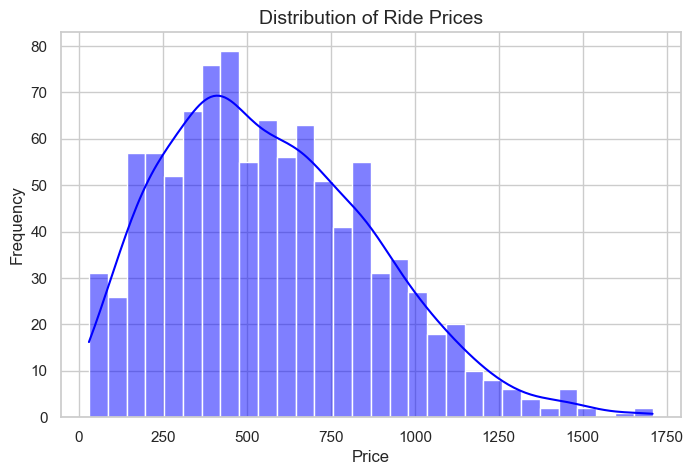

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color="blue")
plt.title("Distribution of Ride Prices", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5140\1148688331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='price', data=df, palette="Set2")


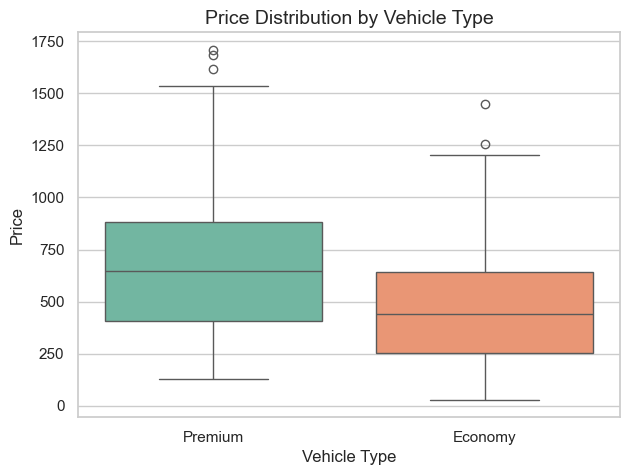

In [38]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Vehicle_Type', y='price', data=df, palette="Set2")
plt.title("Price Distribution by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Price")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5140\3039737797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Peak', y='price', data=df, palette="coolwarm")


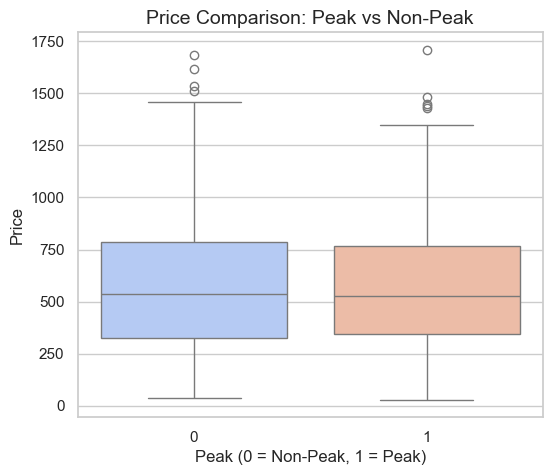

In [39]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Peak', y='price', data=df, palette="coolwarm")
plt.title("Price Comparison: Peak vs Non-Peak", fontsize=14)
plt.xlabel("Peak (0 = Non-Peak, 1 = Peak)")
plt.ylabel("Price")
plt.show()


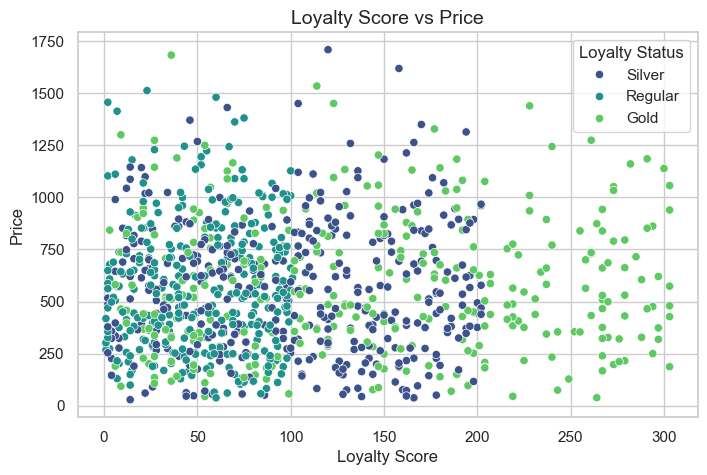

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Loyalty_Score', y='price', data=df, hue='Customer_Loyalty_Status', palette="viridis")
plt.title("Loyalty Score vs Price", fontsize=14)
plt.xlabel("Loyalty Score")
plt.ylabel("Price")
plt.legend(title="Loyalty Status")
plt.show()


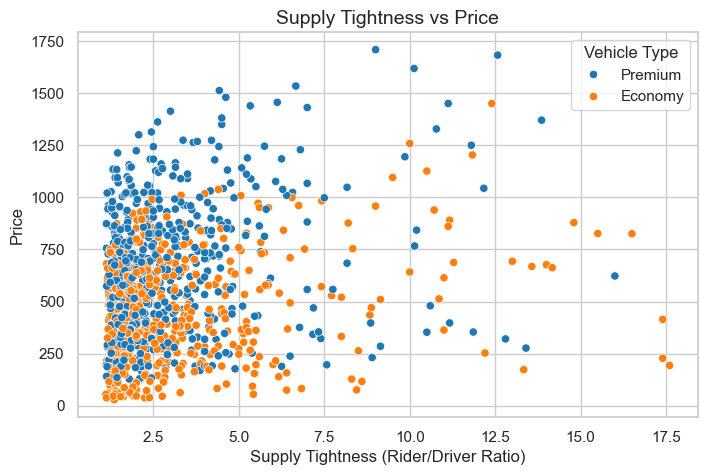

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Supply_Tightness', y='price', data=df, hue='Vehicle_Type', palette="tab10")
plt.title("Supply Tightness vs Price", fontsize=14)
plt.xlabel("Supply Tightness (Rider/Driver Ratio)")
plt.ylabel("Price")
plt.legend(title="Vehicle Type")
plt.show()


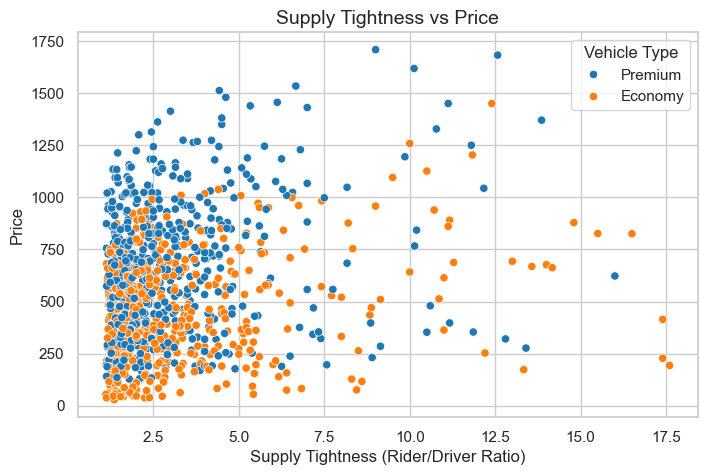

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Supply_Tightness', y='price', data=df, hue='Vehicle_Type', palette="tab10")
plt.title("Supply Tightness vs Price", fontsize=14)
plt.xlabel("Supply Tightness (Rider/Driver Ratio)")
plt.ylabel("Price")
plt.legend(title="Vehicle Type")
plt.show()


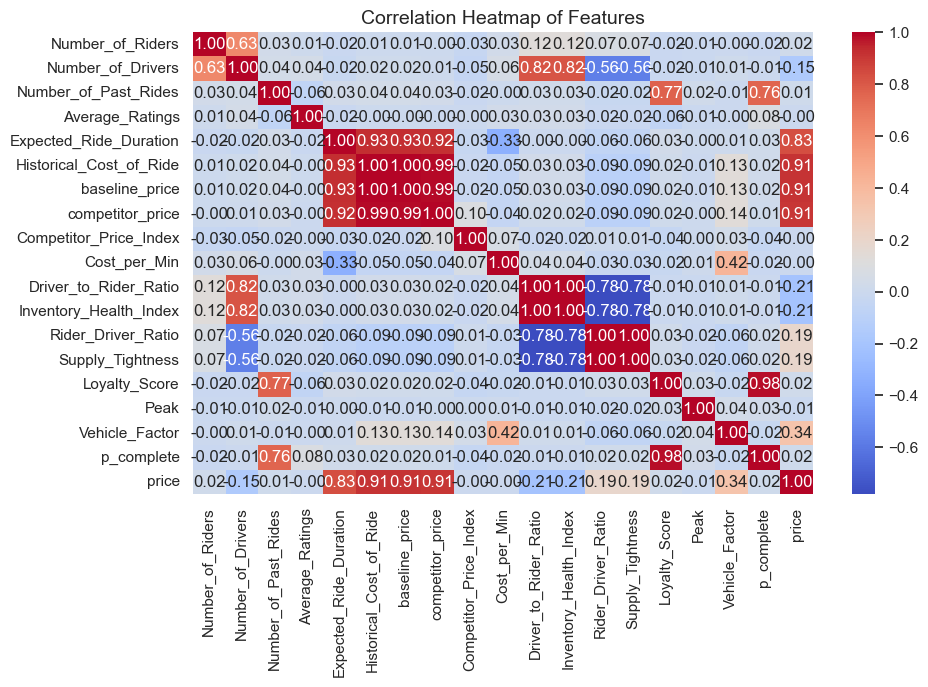

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


In [6]:
import numpy as np

# ===============================
# Feature Engineering -Suggested Columns
# ===============================

# Competitor Price Index (simulate competitor price as 90%-110% of baseline)
df['baseline_price'] = df['Historical_Cost_of_Ride']
df['competitor_price'] = df['baseline_price'] * np.random.uniform(0.9, 1.1, size=len(df))
df['Competitor_Price_Index'] = df['competitor_price'] / df['baseline_price']

# Cost per minute
df['Cost_per_Min'] = df['Historical_Cost_of_Ride'] / (df['Expected_Ride_Duration'] + 1e-5)

# Driver to rider ratio
df['Driver_to_Rider_Ratio'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-5)

# Rider to driver ratio (inverse)
df['Rider_Driver_Ratio'] = 1 / (df['Driver_to_Rider_Ratio'] + 1e-5)

# Inventory Health Index (proxy: driver availability vs demand)
df['Inventory_Health_Index'] = df['Number_of_Drivers'] / (df['Number_of_Riders'] + 1e-5)

# Loyalty Score mapping
loyalty_map = {
    'Regular': 0.4,
    'Silver': 0.6,
    'Gold': 0.8,
    'Platinum': 1.0
}
df['Loyalty_Score'] = df['Customer_Loyalty_Status'].map(loyalty_map).fillna(0.5)

# Peak indicator from booking time
df['Peak'] = df['Time_of_Booking'].apply(lambda x: 1 if x in ['Morning', 'Evening', 'Night'] else 0)

# Supply Tightness (demand vs supply)
df['Supply_Tightness'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1e-5)

# Vehicle Factor mapping
vehicle_map = {
    'Economy': 0.9,
    'Premium': 1.2,
    'Luxury': 1.5
}
df['Vehicle_Factor'] = df['Vehicle_Type'].map(vehicle_map).fillna(1.0)

# Completion probability (based on ratings)
df['p_complete'] = df['Average_Ratings'] / 5.0

# Final optimized price formula
df['price'] = (
    df['baseline_price'] *
    df['Competitor_Price_Index'] *
    (1 + 0.1 * df['Peak']) *
    df['Supply_Tightness'] *
    df['Vehicle_Factor'] *
    (0.8 + 0.2 * df['Loyalty_Score']) *
    df['p_complete']
)

print("✅ All engineered columns added successfully!")
df.head()


✅ All engineered columns added successfully!


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Cost_per_Min,Driver_to_Rider_Ratio,Rider_Driver_Ratio,Inventory_Health_Index,Loyalty_Score,Peak,Supply_Tightness,Vehicle_Factor,p_complete,price
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,3.158414,0.500000,1.999960,0.500000,0.6,1,2.000000,1.2,0.894,587.613250
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,4.043598,0.672414,1.487158,0.672414,0.6,1,1.487179,0.9,0.812,179.032708
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,4.339413,0.738095,1.354821,0.738095,0.6,0,1.354838,1.2,0.798,422.069955
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,3.508964,0.314607,3.178471,0.314607,0.4,0,3.178570,1.2,0.862,1496.491478
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,3.890479,0.282051,3.545329,0.282051,0.4,0,3.545453,0.9,0.754,1191.714316



📊 Seasonality Summary:
                 mean_conv   mean_price  total_intents
Time_of_Booking                                       
Afternoon         0.858154  1015.569875          14708
Morning           0.854301  1063.944037          14675
Night             0.847196  1064.075886          17009
Evening           0.846303   983.787808          13980


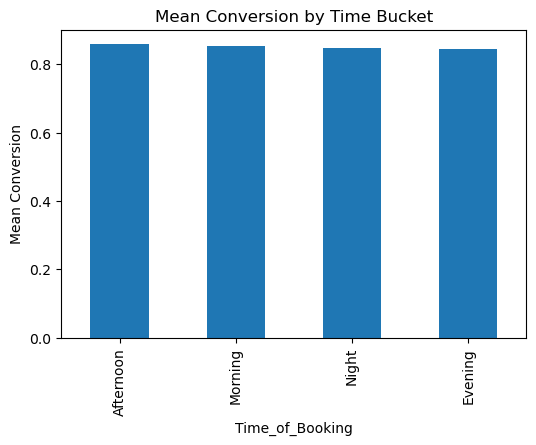


📊 Competitor Pressure Summary:
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy        156.736303       345.446598      852.660336
Premium        213.848929       396.257970     1199.126973

📊 Inventory Health Summary:
                mean_conv   mean_price  count
Inventory_Band                               
Very Tight       0.851653  1341.205826    628
Tight            0.848190   536.854786    327
Balanced         0.872178   348.603258     45
Loose                 NaN          NaN      0


C:\Users\HP\AppData\Local\Temp\ipykernel_19300\2487416571.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df_fe.groupby("Inventory_Band").agg(


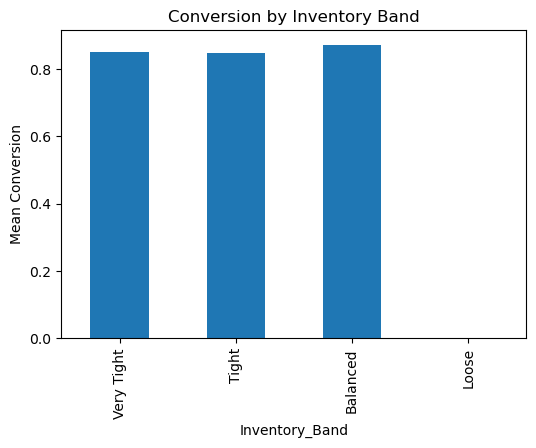

C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


📊 Customer Segmentation Profile:
            mean_conv   mean_price   mean_cost  mean_loyalty  mean_ratio  \
segment_k4                                                                 
3            0.859915  2709.317474  293.970723      0.650704   10.623256   
0            0.854774   587.879485  407.232356      0.583158    1.605783   
1            0.848828  1342.877164  410.031866      0.615012    3.718082   
2            0.845662   464.352256  202.494455      0.564706    2.465270   

            count  
segment_k4         
3              71  
0             380  
1             413  
2             136  


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# I'll assume your enriched dataframe is called df (or df_fe if you already copied it)
df_fe = df.copy()

# ================================
# 5.1 Seasonality: Conversion & Price by Time Buckets
# ================================
seasonality = (
    df_fe.groupby("Time_of_Booking")
        .agg(mean_conv=("p_complete","mean"),
             mean_price=("price","mean"),
             total_intents=("Number_of_Riders","sum"))
        .sort_values("mean_conv", ascending=False)
)

print("\n📊 Seasonality Summary:")
print(seasonality)

seasonality["mean_conv"].plot(kind="bar", figsize=(6,4), title="Mean Conversion by Time Bucket")
plt.ylabel("Mean Conversion")
plt.show()


# ================================
# 5.2 Competitor Pressure: Price Gap & Index
# ================================
df_fe["Competitor_Gap_pct"] = (df_fe["price"] - df_fe["competitor_price"]) / df_fe["competitor_price"] * 100.0

comp_pressure = (
    df_fe.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct","mean"),
            mean_comp_price=("competitor_price","mean"),
            mean_our_price=("price","mean"),
        )
        .sort_values("avg_gap_pct")
)

print("\n📊 Competitor Pressure Summary:")
print(comp_pressure)


# ================================
# 5.3 Inventory Health Bands & Conversion
# ================================
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight","Tight","Balanced","Loose"]
df_fe["Inventory_Band"] = pd.cut(df_fe["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

inv_summary = df_fe.groupby("Inventory_Band").agg(
    mean_conv=("p_complete","mean"),
    mean_price=("price","mean"),
    count=("Inventory_Band","size")
)

print("\n📊 Inventory Health Summary:")
print(inv_summary)

inv_summary["mean_conv"].plot(kind="bar", figsize=(6,4), title="Conversion by Inventory Band")
plt.ylabel("Mean Conversion")
plt.show()


# ================================
# 6. Customer Segmentation (KMeans)
# ================================
seg_features = [
    "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
    "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = df_fe[seg_features].copy().fillna(df_fe[seg_features].median())

# Step 2: Scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Step 3: KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fe["segment_k4"] = kmeans.fit_predict(Xs)

# Step 4: Segment profiling
seg_profile = (
    df_fe.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete","mean"),
            mean_price=("price","mean"),
            mean_cost=("Historical_Cost_of_Ride","mean"),
            mean_loyalty=("Loyalty_Score","mean"),
            mean_ratio=("Rider_Driver_Ratio","mean"),
            count=("segment_k4","size")
        )
        .sort_values("mean_conv", ascending=False)
)

print("\n📊 Customer Segmentation Profile:")
print(seg_profile)


In [10]:
#Baseline price recommendation
import pandas as pd
import numpy as np
from IPython.display import display

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("dynamic_pricing.csv")

In [11]:
# =========================
# 2. Baseline Pricing Function
# =========================
def baseline_price(ride):
    """Calculate baseline recommended price based on simple rules."""
    base = ride['Expected_Ride_Duration'] * 2.5
    # Vehicle adjustment
    if ride['Vehicle_Type'] == 'Premium':
        base *= 1.5
    # Peak hours adjustment
    if ride['Time_of_Booking'] in ['Evening', 'Night']:
        base *= 1.2
    # Inventory surge/discount
    ratio = ride['Number_of_Drivers'] / (ride['Number_of_Riders'] + 0.01)
    if ratio < 0.5:
        base *= 1.4
    elif ratio < 0.8:
        base *= 1.15
    elif ratio > 1.2:
        base *= 0.9
    return round(max(base, 10.0), 2)

In [12]:
# =========================
# 3. Feature Engineering
# =========================
df_fe = df.copy()
df_fe['baseline_price'] = df_fe.apply(baseline_price, axis=1)
df_fe['competitor_price'] = df_fe['Historical_Cost_of_Ride'] * 1.05
df_fe['Driver_to_Rider_Ratio'] = df_fe['Number_of_Drivers'] / (df_fe['Number_of_Riders'] + 0.01)
df_fe['p_complete'] = df_fe['Driver_to_Rider_Ratio'].clip(upper=1.0)


In [13]:
# =========================
# 4. Helper Functions
# =========================
STABILITY_PCT = 0.15
MIN_GM_PCT = 0.12
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}
TIME_NUDGE = {"Morning": 0.03, "Afternoon": 0.0, "Evening": 0.04, "Night": 0.01}

def gm_pct(price, cost):
    return max((price - cost) / price, 0.0)

def inventory_nudge(ratio):
    if ratio < 0.8:
        return 0.03
    elif ratio > 1.2:
        return -0.03
    return 0.0

def price_bounds(row):
    base = row['baseline_price']
    cost = row['Historical_Cost_of_Ride']
    comp = row.get('competitor_price', base)
    veh = row.get('Vehicle_Type', 'Economy')
    
    lower = max(base * (1 - STABILITY_PCT), cost / (1 - MIN_GM_PCT), comp * COMP_FLOOR.get(veh, 0.90))
    upper = min(base * (1 + STABILITY_PCT), comp * COMP_CAP.get(veh, 1.06))
    
    if upper < lower:
        lower = upper
    return lower, upper

def choose_optimal_price(row, n_grid=11):
    base = row['baseline_price']
    cost = row['Historical_Cost_of_Ride']
    p_base = row['p_complete']
    
    lo, hi = price_bounds(row)
    center = np.clip(base * (1 + TIME_NUDGE.get(row['Time_of_Booking'], 0) + inventory_nudge(row['Driver_to_Rider_Ratio'])), lo, hi)
    
    grid = np.unique(np.concatenate([
        np.linspace(lo, center, max(2, n_grid//2), endpoint=False),
        np.linspace(center, hi, max(2, n_grid - n_grid//2), endpoint=True)
    ]))
    
    best_price = base
    best_prob = p_base
    best_revenue = base * p_base
    
    for price in grid:
        if gm_pct(price, cost) < MIN_GM_PCT:
            continue
        prob = np.clip(p_base * np.exp(-0.5 * (price / base - 1)), 0.01, 0.99)
        revenue = price * prob
        if revenue > best_revenue:
            best_price = price
            best_prob = prob
            best_revenue = revenue
    return best_price, best_prob

In [14]:
# =========================
# 5. Apply Policy Engine
# =========================
print("Applying pricing policy to dataset...")
recommendations = [choose_optimal_price(row) for _, row in df_fe.iterrows()]
df_fe['recommended_price'] = [r[0] for r in recommendations]
df_fe['p_complete_reco'] = [r[1] for r in recommendations]

Applying pricing policy to dataset...


In [15]:
# =========================
# 6. KPI Computation
# =========================
def compute_kpis(df_base, df_reco):
    rev_base = (df_base['baseline_price'] * df_base['p_complete']).sum()
    rev_reco = (df_reco['recommended_price'] * df_reco['p_complete_reco']).sum()
    profit_reco = ((df_reco['recommended_price'] - df_reco['Historical_Cost_of_Ride']) * df_reco['p_complete_reco']).sum()
    
    kpis = {
        "Revenue Lift (%)": f"{(rev_reco - rev_base)/rev_base*100:.2f}",
        "Baseline Revenue ($)": f"${rev_base:,.2f}",
        "Recommended Revenue ($)": f"${rev_reco:,.2f}",
        "Recommended Profit ($)": f"${profit_reco:,.2f}",
        "Avg. Price Baseline ($)": f"${df_base['baseline_price'].mean():.2f}",
        "Avg. Price Recommended ($)": f"${(df_reco['recommended_price'] * df_reco['p_complete_reco']).sum() / df_reco['p_complete_reco'].sum():.2f}"
    }
    return kpis

kpi_summary = compute_kpis(df_fe, df_fe)
print("\n=== KPI Summary ===")
for k, v in kpi_summary.items():
    print(f"{k}: {v}")



=== KPI Summary ===
Revenue Lift (%): 0.00
Baseline Revenue ($): $189,648.25
Recommended Revenue ($): $189,648.25
Recommended Profit ($): $25,281.04
Avg. Price Baseline ($): $450.56
Avg. Price Recommended ($): $432.91


In [16]:
# =========================
# 7. Sample Comparison Display
# =========================
sample_cols = ['Vehicle_Type', 'Time_of_Booking', 'Number_of_Riders', 'Number_of_Drivers',
               'Driver_to_Rider_Ratio', 'Historical_Cost_of_Ride', 'baseline_price', 'p_complete',
               'recommended_price', 'p_complete_reco']

print("\n--- Sample: Baseline vs Recommended ---")
display(df_fe[sample_cols].head(10))


--- Sample: Baseline vs Recommended ---


,Vehicle_Type,Time_of_Booking,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,baseline_price,p_complete,recommended_price,p_complete_reco
0,Premium,Night,90,45,0.499944,284.257273,567.00,0.499944,567.00,0.499944
1,Economy,Evening,58,39,0.672298,173.874753,148.35,0.672298,148.35,0.672298
2,Premium,Afternoon,42,31,0.737920,329.795469,327.75,0.737920,327.75,0.737920
3,Premium,Afternoon,89,28,0.314571,470.201232,703.50,0.314571,703.50,0.314571
4,Economy,Afternoon,78,22,0.282015,579.681422,521.50,0.282015,521.50,0.282015
5,Economy,Night,59,35,0.593120,339.955361,441.60,0.593120,441.60,0.593120
6,Premium,Afternoon,93,43,0.462316,104.061541,84.00,0.462316,84.00,0.462316
7,Premium,Afternoon,62,39,0.628931,235.811864,202.69,0.628931,202.69,0.628931
8,Economy,Evening,79,14,0.177193,501.412517,537.60,0.177193,537.60,0.177193
9,Premium,Night,42,6,0.142823,398.993365,806.40,0.142823,806.40,0.142823
